# 分别统计不同病变区域的数量

In [1]:
from PIL import Image, ImageDraw
import cv2
import numpy as np
import os,sys
import scipy.io
import csv
%matplotlib inline
ROOT_DIR = os.getcwd()

In [2]:
DR_IMAGE_DIR = os.path.join(ROOT_DIR, "ImageSynthesis/4lesions/HE") #DRDataset/SubChallenge_1_Images
    # Load a random image from the images folder
file_names = next(os.walk(DR_IMAGE_DIR))[2]

In [3]:
def extractROI(img_new, filename, typelesion):
    image = Image.fromarray(img_new)
    img_gray=np.array(image.convert("L")) 
    mask_arr = np.array(img_gray != 0).astype(np.uint8)

    mask_arr = mask_arr*255
    [x,y]=img_gray.shape
    Mask_arr= np.zeros([x,y,3], dtype = np.uint8)

    ROI,contours,hierarchy= cv2.findContours(mask_arr,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)

    #box = []
    centerlist = [] 
    mylist2 = []
    #for item in data: 
    
    lesionNum = len(contours)
    area = cv2.countNonZero(mask_arr)

    for i in range(len(contours)):
        x,y,w,h=cv2.boundingRect(contours[i]) #（x,y）为矩形左上角的坐标，（w,h）是矩形的宽和高
        centerX = round(x + w/2)
        centerY = round(y + h/2)
        centerlist.append([centerX, centerY])
    
    centerLocation = np.array(centerlist)
    scipy.io.savemat('ImageSynthesis/4lesions/'+typelesion+'/'+filename+'.mat',
                 {'centerLocation':centerLocation})  # 写入mat文件 
    return lesionNum,area

def extractROI2(img_new):
    image = Image.fromarray(img_new)
    img_gray=np.array(image.convert("L")) 
    mask_arr = np.array(img_gray != 0).astype(np.uint8)

    mask_arr = mask_arr*255
    [x,y]=img_gray.shape
    Mask_arr= np.zeros([x,y,3], dtype = np.uint8)

    ROI,contours,hierarchy= cv2.findContours(mask_arr,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
    lesionNum = len(contours)
    area = 0
    #for i in range(len(contours)):
    area = cv2.countNonZero(mask_arr)

    return lesionNum,area

In [4]:
#Pointdata = [['Image No', 'MA', 'HR', 'HE', 'SE', 'areaMA', 'areaHR', 'areaHE', 'areaSE']]
Pointdata = [['Image No', 'MA', 'HR', 'HE', 'areaMA', 'areaHR', 'areaHE']]

for i in range(len(file_names)):  #len(file_names)
    newfile_name = file_names[i].strip('.png')
    #print(i+1, newfile_name)
    src1 = cv2.imread("ImageSynthesis/4lesions/HE0940/"+file_names[i])
    HELesionNum,areaHE = extractROI(src1, newfile_name, 'HELocation0940')
    #HELesionNum,areaHE = extractROI2(src1)
    
#     src2 = cv2.imread("ImageSynthesis/4lesions/SE/"+file_names[i])
#     SELesionNum,areaSE = extractROI2(src2)
    
    src3 = cv2.imread("ImageSynthesis/4lesions/MA0930/"+file_names[i])
    MALesionNum,areaMA = extractROI2(src3)
    
    src4 = cv2.imread("ImageSynthesis/4lesions/HR/"+file_names[i])
    HRLesionNum,areaHR = extractROI2(src4)
    
    Pointdata.append([file_names[i], MALesionNum, HRLesionNum, HELesionNum, areaMA, areaHR, areaHE])
    
#     Pointdata.append([file_names[i], MALesionNum, HRLesionNum, HELesionNum, SELesionNum,
#                      areaMA, areaHR, areaHE, areaSE])
   
csvFile2 = open('ImageSynthesis/4lesions/LesionNumNewMA0930HE0940.csv','w', newline='') # 设置newline，否则两行之间会空一行
writer = csv.writer(csvFile2)
m = len(Pointdata)
for i in range(m):
    writer.writerow(Pointdata[i])
csvFile2.close()

#     src = src1 + src2 + src3 + src4
#     im_gray = cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)
#     retval, im_at_fixed = cv2.threshold(im_gray, 50, 255, cv2.THRESH_BINARY) 
#     #im_at_mean = cv2.adaptiveThreshold(im_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 5, 10)
#     cv2.imwrite('ImageSynthesis/4lesions/syn/'+file_names[i],im_at_fixed)

40

42

37

32

32

37

41

32

40

41

41

35

41

36

44

42

41

38

35

38

38

36

32

40

38

39

40

38

43

39

37

40

35

38

38

34

40

43

40

33

36

43

35

29

33

42

36

27

37

37

36

38

38

42

42

42

32

38

41

44

36

35

31

41

37

37

38

35

42

42

31

36

34

40

41

38

42

37

41

37

38

37

41

37

30

39

38

38

37

39

39

38

40

40

38

34

39

29

36

41

31

41

35

34

38

43

41

38

38

36

38

33

39

33

42

35

35

31

32

29

35

31

40

43

31

44

37

44

35

33

37

39

35

35

34

40

38

43

33

29

35

33

41

35

31

35

34

37

40

36

40

34

42

36

34

43

33

27

38

36

38

38

34

33

41

40

43

33

35

42

42

41

40

42

40

40

27

33

35

35

33

38

39

31

38

37

35

41

41

40

34

32

35

33

30

35

41

32

32

43

38

37

42

43

27

35

34

31

38

41

36

27

32

40

30

40

39

36

27

36

34

42

45

35

41

33

33

32

35

42

34

31

29

31

42

38

35

29

31

37

31

44

36

39

32

29

31

42

33

31

32

37

34

34

33

36

30

30

40

36

41

40

29

34

29

40

39

36

32

33

31

42

30

39

34

42

41

35

37

42

29

34

32

42

43

27

30

31

31

42

40

43

27

31

31

36

39

40

34

29

42

36

34

38

42

36

35

31

38

35

35

34

36

29

27

27

39

39

29

37

38

40

33

37

40

31

31

42

31

34

38

35

37

35

32

32

37

32

44

41

39

34

41

44

37

30

32

42

39

42

34

42

32

41

42

40

27

36

32

42

32

31

38

35

41

37

40

36

38

42

31

32

42

40

38

38

38

40

40

35

31

38

31

37

41

41

37

41

39

43

38

41

33

29

38

39

41

39

38

39

41

38

38

37

42

29

41

33

40

35

38

42

28

37

# 计算DME

In [2]:
import numpy as np
import os,sys
import scipy.io
import xlrd
import csv
import xlwt
import pylab
import matplotlib.pyplot as plt
%matplotlib inline
ROOT_DIR = os.getcwd()

In [3]:
DR_IMAGE_DIR = os.path.join(ROOT_DIR, "ImageSynthesis/4lesions/HE") #DRDataset/SubChallenge_1_Images
    # Load a random image from the images folder
file_names = next(os.walk(DR_IMAGE_DIR))[2]

In [4]:
widthdata = xlrd.open_workbook('ImageSynthesis/4lesions/ODCenter-Width.xlsx')
widthtable = widthdata.sheets()[0]          #通过索引顺序获取
widthnrows = widthtable.nrows
#print(widthnrows)
widthNameImage = widthtable.col_values(0)

def findODWidth(filename):
    p=widthNameImage.index(filename)
    width = widthtable.cell(p,6).value
    #print(width)
    return width

FileNotFoundError: [Errno 2] No such file or directory: 'ImageSynthesis/4lesions/ODCenter-Width.xlsx'

In [8]:
foveacenterdata = xlrd.open_workbook('ImageSynthesis/4lesions/FoveaCenterNEW6.xlsx')
centertable = foveacenterdata.sheets()[0]          #通过索引顺序获取
centernrows = centertable.nrows
#print(centernrows)
centerNameImage = centertable.col_values(0)
#print(type(centerNameImage))
def findFoverCenter(filename):
    p=centerNameImage.index(filename)
    x = centertable.cell(p,1).value
    y = centertable.cell(p,2).value
    center = [x, y]
    #print(center)
    return center

In [9]:
Pointdata = [['Image No', 'DMEGrading']]
for i in range(len(file_names)):  #len(file_names)
    newfile_name = file_names[i].strip('.png')
    #print(i+1, newfile_name)
    data = scipy.io.loadmat('ImageSynthesis/4lesions/HELocation0940/'+newfile_name+'.mat') 
    centerLocation = data['centerLocation']
    foveacenter = findFoverCenter(newfile_name)
    width = findODWidth(newfile_name)
    distance = []
    if len(centerLocation) <= 18:
        dmeGrading = 0
    else:
        for j in range(len(centerLocation)):    #len(centerLocation)
    #         print(centerLocation[j][0])
    #         print(centerLocation[j][1])
    #         print(foveacenter[0])
    #         print(foveacenter[1])        
            temp = ((centerLocation[j][0] - foveacenter[0])**2 + (centerLocation[j][1] - foveacenter[1])**2)** 0.5
            distance.append(round(temp))
        minds = min(distance)
        if minds <= width:
            dmeGrading = 2
        else:
            dmeGrading = 1
    
    Pointdata.append([file_names[i], dmeGrading])
   
csvFile2 = open('ImageSynthesis/4lesions/DMEGrading0940.csv','w', newline='') # 设置newline，否则两行之间会空一行
writer = csv.writer(csvFile2)
m = len(Pointdata)
for i in range(m):
    writer.writerow(Pointdata[i])
csvFile2.close()

21

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

17

# 统计DME准确率

0.799031476998
(array([16]),)


Text(0.5,0,'HE No.')

Text(0,0.5,'ACC')

Text(0.5,1,'Line plot')

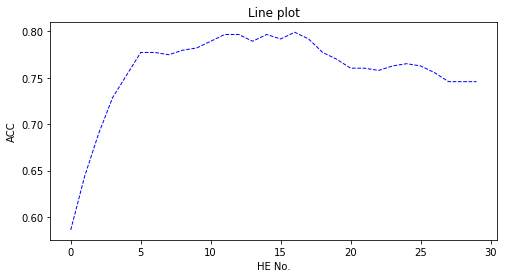

In [15]:
# 用来计算DME Grading的accuracy
#Dmegrading = []
accuracy = []
x = []
data = xlrd.open_workbook('ImageSynthesis/4lesions/IDRiD_Training_Set.xlsx')
table = data.sheets()[0]          #通过索引顺序获取
nrows = table.nrows
gtDMEgrading = table.col_values(2)
GTDMEGrading = gtDMEgrading[1:]
for k in range(30):
    Dmegrading = []
    x.append(k)
    for i in range(len(file_names)):  #len(file_names)
        #newfile_name = file_names[i].strip('.png')
        newfile_name = 'IDRiD_%03d' % (i+1)
        #print(i+1, newfile_name)
        data = scipy.io.loadmat('ImageSynthesis/4lesions/HELocation1030/'+newfile_name+'.mat') 
        centerLocation = data['centerLocation']
        foveacenter = findFoverCenter(newfile_name)
        width = findODWidth(newfile_name)
        distance = []

        if len(centerLocation) <= k:
            dmeGrading = 0
        else:
            for j in range(len(centerLocation)):    #len(centerLocation)      
                temp = ((centerLocation[j][0] - foveacenter[0])**2 + (centerLocation[j][1] - foveacenter[1])**2)** 0.5
                distance.append(round(temp))
            minds = min(distance)
            if minds <= width:
                dmeGrading = 2
            else:
                dmeGrading = 1
        Dmegrading.append(dmeGrading)

    temp = np.array(Dmegrading) - np.array(GTDMEGrading)
    acc = np.sum(temp == 0)/413
    accuracy.append(acc)
    #print(k,acc)

ACC = np.amax(accuracy)
Position = np.where(accuracy == ACC)
#print(x)
print(ACC)
print(Position)

plt.figure(figsize=(8,4)) #创建绘图对象  
plt.plot(x,accuracy,"b--",linewidth=1)   #在当前绘图对象绘图（X轴，Y轴，蓝色虚线，线宽度）  
plt.xlabel("HE No.") #X轴标签  
plt.ylabel("ACC")  #Y轴标签  
plt.title("Line plot") #图标题  
plt.savefig("ImageSynthesis/4lesions/lineHE1030.pdf") #保存图  
plt.show()  #显示图

In [118]:
history

import numpy as np
import os,sys
import scipy.io
DR_IMAGE_DIR = os.path.join(ROOT_DIR, "ImageSynthesis/4lesions/HE") #DRDataset/SubChallenge_1_Images
    # Load a random image from the images folder
file_names = next(os.walk(DR_IMAGE_DIR))[2]
import numpy as np
import os,sys
import scipy.io
%matplotlib inline
ROOT_DIR = os.getcwd()
DR_IMAGE_DIR = os.path.join(ROOT_DIR, "ImageSynthesis/4lesions/HE") #DRDataset/SubChallenge_1_Images
    # Load a random image from the images folder
file_names = next(os.walk(DR_IMAGE_DIR))[2]

for i in range(2):  #len(file_names)
    newfile_name = file_names[i].strip('.png')
    data = scipy.io.loadmat('ImageSynthesis/4lesions/HELocation/'+newfile_name+'.mat')

for i in range(2):  #len(file_names)
    newfile_name = file_names[i].strip('.png')
    data = scipy.io.loadmat('ImageSynthesis/4lesions/HELocation/'+newfile_name+'.mat')
    centerLocation = data['centerLocation']
    print(centerLocation)
import numpy as np
import os,sys
import scipy.io
import xl